In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
from librosa import display
import librosa

In [6]:
#feature set
#This voice is of a Harshit
# Load the audio as a waveform `y`
# Store the sampling rate as `sr`
y,sr=librosa.load("C:/Users/hbhat/Speaker-Identification-from-Voice-master/data_set_create/Harshit/Harshit1.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40)
chroma_cq =librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36)
chroma_cens =librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

((40, 130), (40, 130), (36, 130), (36, 130), (40, 130))

In [7]:
len(mfccs)

40

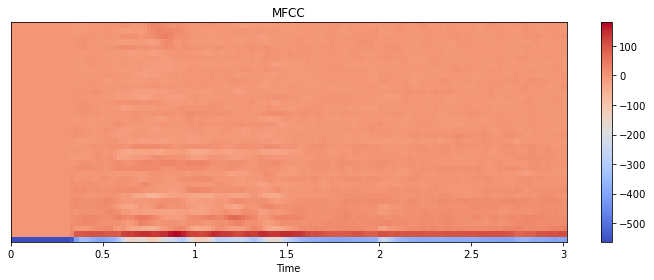

In [8]:
#MFCC of Harshit's voice
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
#print(mfccs)

C:\ProgramData\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


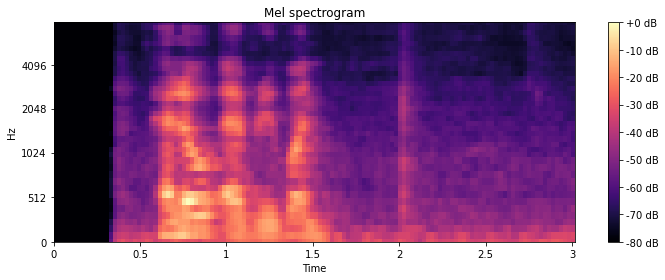

In [9]:
#Melspectrogram of harshit's voice
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

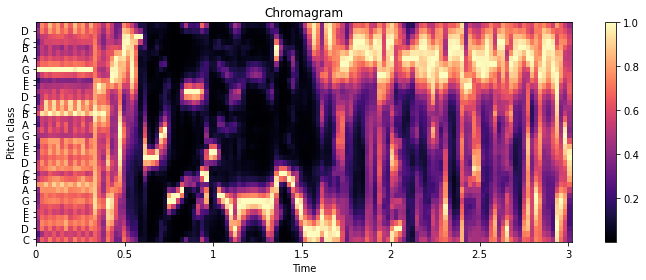

In [10]:
#Chromagram of harshit's voice
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

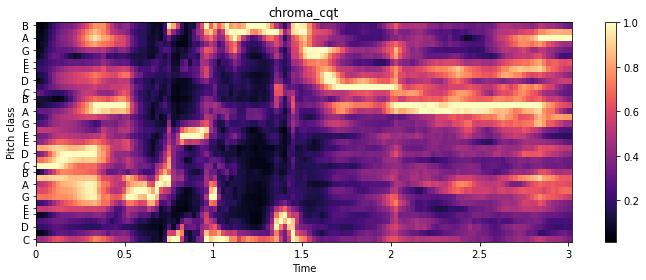

In [11]:
#Chroma cqt of harshit's voice
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cqt')
plt.tight_layout()

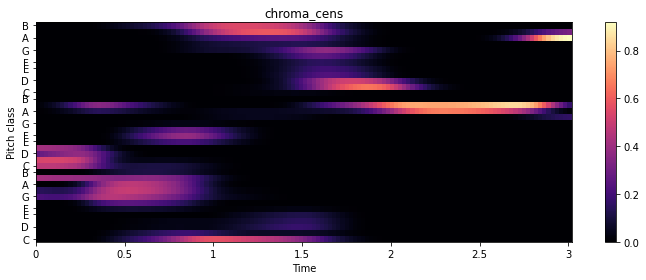

In [12]:
#Chroma cens of a harshit's voice
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cens')
plt.tight_layout()

In [18]:
#feature set
y,sr=librosa.load("C:/Users/hbhat/Speaker-Identification-from-Voice-master/data_set_create/Harshit/Harshit15.wav")
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36).T,axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36).T,axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36).T,axis=0)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

((36,), (36,), (36,), (36,), (36,))

In [20]:
#stacking and reshaping
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(36,5))
print(features.shape)
for i in range(36):
  print(features[i])

(36, 5)
[-287.81921387   85.18498993   -4.1712327    23.86144829   21.75243759]
[-0.87708998 -4.97545719  2.05608726 -4.20607281  8.32012844]
[ 0.55122644 -1.12970996  0.04962111  8.53226185  1.24195993]
[-1.03335881 -2.89888215  5.79704285 -5.95757151 -1.28634644]
[-2.11205578  0.66089809 -1.1885004  -0.64902216  0.77393341]
[ 0.31890705 -8.59249687 -0.1547491  -3.62641597 -1.92738473]
[-2.98391104 -1.43866241 -1.62458026 -0.73183972 -1.85888779]
[1.27430689 1.00358999 6.00988626 1.20701659 1.96936083]
[ 3.19390965  4.719419   13.49272919 10.63162994  0.42962092]
[0.08789945 0.11852086 0.08170276 0.06837911 0.10742786]
[0.10854754 0.11345401 1.05631065 1.27986145 2.01825309]
[2.34407997 0.54837561 0.12469318 0.314531   0.5092544 ]
[0.23161712 0.208      0.13792822 0.04264148 0.04144404]
[0.05321411 0.01669659 0.01807539 0.04791916 0.01460895]
[0.01776261 0.02004788 0.4318428  0.43683735 0.42189249]
[0.38958523 0.36965409 0.38331288 0.39949241 0.41226548]
[0.41857329 0.3727937  0.34538

In [21]:
#preprocessing using only mfcc
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path = 'C:/Users/hbhat/Speaker-Identification-from-Voice-master/data_set_create'
 
files = os.listdir(path)
for name in tqdm(files):
    
  filename = path+"/"+name
  #print(filename)
  files1 = os.listdir(filename)
  for name1 in files1:
      #print(filename+"/"+name1)
      filename1 = filename+"/"+name1
      y,sr=librosa.load(filename1)
      mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
      melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000).T,axis=0)
      chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36).T,axis=0)
      chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36).T,axis=0)
      chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36).T,axis=0)
      features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(36,5))
      x_train.append(features)
      y_train.append(name)

100%|██████████| 9/9 [01:05<00:00,  7.28s/it]


In [22]:
len(x_train), len(y_train)

(135, 135)

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)


LabelEncoder()

In [24]:
list(le.classes_)

['Alok',
 'Anindita',
 'Anshula',
 'Deepanshu',
 'Harshit',
 'Himanshu',
 'Maniya',
 'gauri',
 'sumit']

In [25]:
y_train1 = le.transform(y_train) 

In [26]:
le.inverse_transform([0, 1, 2,3,4,5,6,7,8])

array(['Alok', 'Anindita', 'Anshula', 'Deepanshu', 'Harshit', 'Himanshu',
       'Maniya', 'gauri', 'sumit'], dtype='<U9')

In [27]:
#converting the lists into numpy arrays
x_train=np.array(x_train)
y_train=np.array(y_train1)

In [28]:
x_train.shape, y_train.shape

((135, 36, 5), (135,))

In [29]:
#reshaping into 2d to save in csv format
x_train_2d=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_train_2d.shape

(135, 180)

In [30]:
from sklearn.model_selection import train_test_split
x_train_2d, x_test_2d, y_train, y_test = train_test_split(x_train_2d, y_train, test_size = 0.2, random_state = 0)

In [31]:
#saving the data numpy arrays
np.savetxt("train_data1.csv", x_train_2d, delimiter=",")
np.savetxt("test_data1.csv",x_test_2d,delimiter=",")
np.savetxt("train_labels1.csv",y_train,delimiter=",")
np.savetxt("test_labels1.csv",y_test,delimiter=",")

In [32]:
x_train_2d.shape, y_train.shape, x_test_2d.shape, y_test.shape

((108, 180), (108,), (27, 180), (27,))

In [0]:
#downloading the saved data from colab's server
from google.colab import files

files.download("train_data1.csv")
files.download("test_data1.csv")
files.download("train_labels1.csv")
files.download("test_labels1.csv")